In [1]:
import cv2
import pickle
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from undistort import undistort
from perspective_transform import perspective_transform

print('Done Importing')

Done Importing


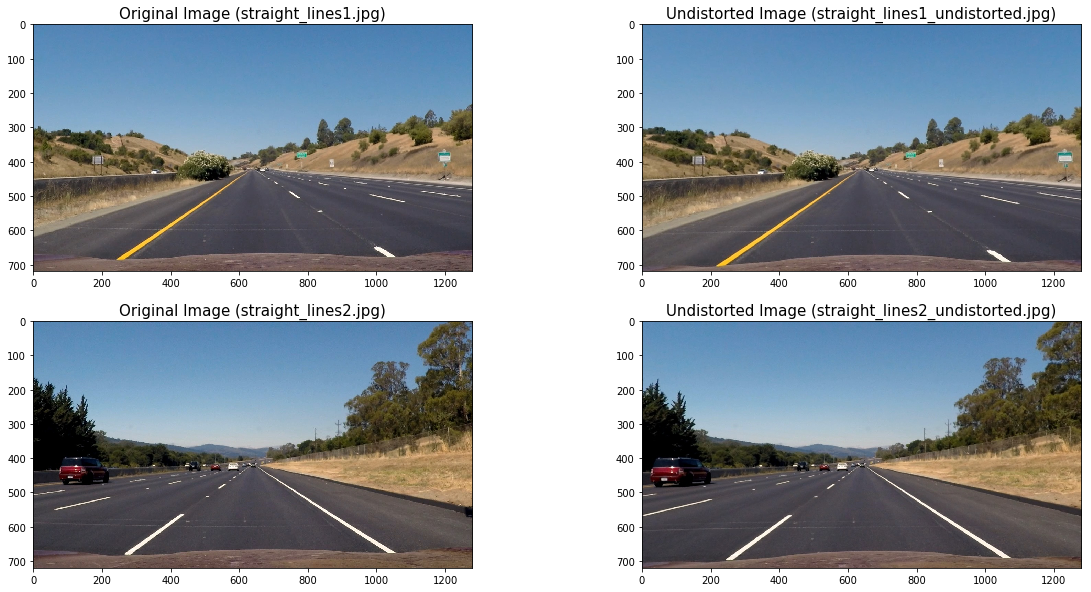

In [2]:
%matplotlib inline

images_fnames = glob.glob('./test_images/straight_lines*.jpg')

camera_calibration_file = './camera_calibration.p'
with open(camera_calibration_file, mode='rb') as f:
    cali_data = pickle.load(f)
mtx, dist = cali_data['mtx'], cali_data['dist']

images = []
undistorted_images = []
for idx, fname in enumerate(images_fnames):
    image = cv2.imread(fname)
    undistorted_image = undistort(image, mtx, dist)
    images.append(image)
    undistorted_images.append(undistorted_image)

f, axes = plt.subplots(len(images), 2, figsize=(20,10))
axes = axes.ravel()
for i, image in enumerate(images):
    fname = os.path.basename(images_fnames[i])
    undistorted_image = undistorted_images[i]
    axes[2*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[2*i].set_title('Original Image (' + fname + ')', fontsize=15)
    
    undistorted_fname = fname.split('.')[0] + '_undistorted.jpg'
    cv2.imwrite('./output_images/' + undistorted_fname, undistorted_image)
    axes[2*i+1].imshow(cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB))
    axes[2*i+1].set_title('Undistorted Image (' + undistorted_fname + ')', fontsize=15)

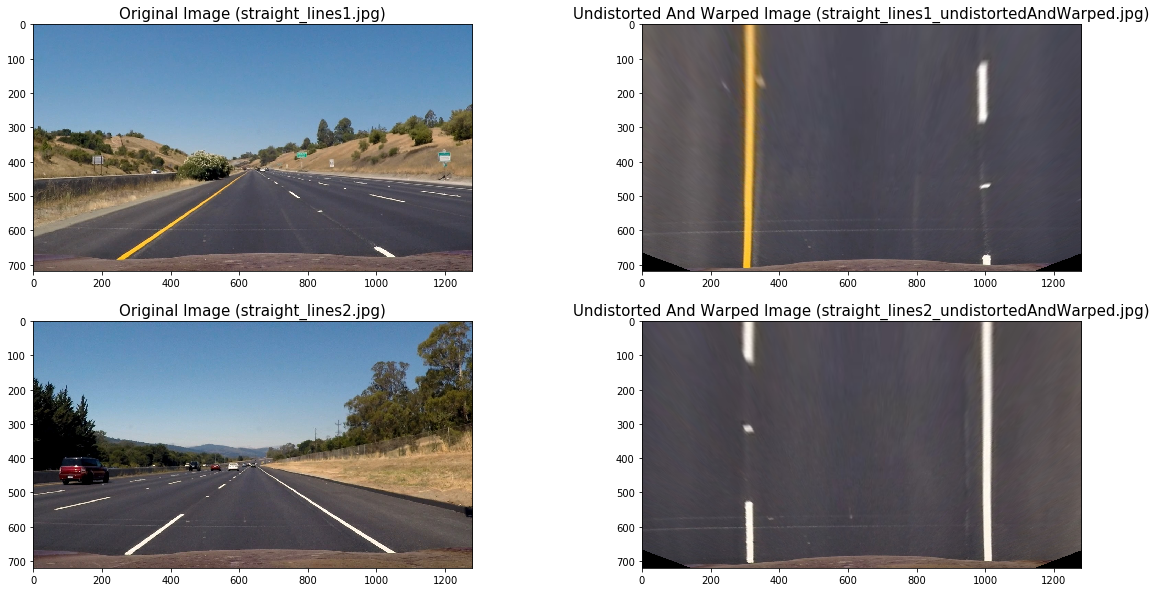

In [3]:
f, axes = plt.subplots(len(images), 2, figsize=(20,10))
axes = axes.ravel()
for i, image in enumerate(images):
    fname = os.path.basename(images_fnames[i])
    axes[2*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[2*i].set_title('Original Image (' + fname + ')', fontsize=15)
    
    undistorted_image = undistorted_images[i]
    warped_image = perspective_transform(undistorted_image)
    warped_fname = fname.split('.')[0] + '_undistortedAndWarped.jpg'
    cv2.imwrite('./output_images/' + warped_fname, warped_image)
    axes[2*i+1].imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
    axes[2*i+1].set_title('Undistorted And Warped Image (' + warped_fname + ')', fontsize=15)